# **Assignment - 2 (Walmart Sales Forecasting)**
### Date 12-2-2021

### Team Members :

### GANESH RAO KUBEENDRA BABU  C0813672

### MOHAMMAD SHAIQ             C0814155

### NIYATI VYAS                C0818552

### URVASHI SRIVASTAVA         C0812562


# **Importing the necessary libraries**

In [111]:
# EDA (Exploratory Data Analysis)
# Involves the task of handling DataFrames, Series, handling and filling np.nan values
#-------------------
import numpy as np
import pandas as pd


# Working with date time 
#-------------------
from datetime import datetime
from datetime import timedelta


#Do some statistics
from scipy import sparse
import scipy.stats as ss
import math


#Nice graphing tools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'
%matplotlib inline


#Machine learning tools
# To work with models while training and testing
#-------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse


## Keras for deep learning
#-------------------
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras import optimizers


## Performance measures
from sklearn.metrics import mean_squared_error

# **Loading the necessary Data sets**

In [2]:
walmart_training = pd.read_csv('train_walmart.csv')
walmart_testing = pd.read_csv('test_walmart.csv')
walmart_store_features = pd.read_csv('feature.csv')
walmart_store_data = pd.read_csv('stores.csv')

# **Performing Exploratory Data Analysis**

### **Merging the data sets**

In [3]:
def mergeData(df):
    merged_DF = pd.merge(df, walmart_store_features, on=['Store','Date','IsHoliday'],
                  how='inner')
    merged_DF = pd.merge(merged_DF, walmart_store_data, on=['Store'],
                  how='inner')
    return merged_DF

In [4]:
walmart_train_set = mergeData(walmart_training)
walmart_train_set['Split'] = 'Train'
walmart_test_set = mergeData(walmart_testing)
walmart_test_set['Split'] = 'Test'

In [5]:
walmart_final_set = pd.concat([walmart_train_set, walmart_test_set],axis=0, ignore_index=True)

### **Printing the head of the data sets**

In [6]:
# Print the head of the data set "walmart_final_set"
walmart_final_set.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  05-02-2018      24924.50      False        42.31       2.572   
1      1     2  05-02-2018      50605.27      False        42.31       2.572   
2      1     3  05-02-2018      13740.12      False        42.31       2.572   
3      1     4  05-02-2018      39954.04      False        42.31       2.572   
4      1     5  05-02-2018      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  Split  
0         8.106    A  151315  Train  
1         8.106    A  151315  Train  
2         8.106    A  151315  Train  
3         8.106    A  151315  Train  
4         8.106    A  151315  Train

### **Understanding the shape of the dataset**

In [7]:
# Print the shape of the data set "walmart_final_set"
walmart_final_set.shape

(536634, 17)

### **Describing the data set**

In [8]:
# Understanding the basic statistics of "walmart_final_set"
walmart_final_set.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  536634.000000  536634.000000  421570.000000  536634.000000   
mean       22.208621      44.277301   15981.258123      58.771762   
std        12.790580      30.527358   22711.183519      18.678716   
min         1.000000       1.000000   -4988.940000      -7.290000   
25%        11.000000      18.000000    2079.650000      45.250000   
50%        22.000000      37.000000    7612.030000      60.060000   
75%        33.000000      74.000000   20205.852500      73.230000   
max        45.000000      99.000000  693099.360000     101.950000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  536634.000000  265596.000000  197685.000000  242326.000000   
mean        3.408310    7438.004144    3509.274827    1857.913525   
std         0.430861    9411.341379    8992.047197   11616.143274   
min         2.472000   -2781.450000    -265.760000    -179.260000   
25%         3.041000    2114.640000      72.500000       7.220000   
50%         3.523000    5126.540000     385.310000      40.760000   
75%         3.744000    9303.850000    2392.390000     174.260000   
max         4.468000  103184.980000  104519.540000  149483.310000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  237143.000000  266496.000000  498472.000000  498472.000000   
mean     3371.556866    4324.021158     172.090481       7.791888   
std      6872.281734   13549.262124      39.542149       1.865076   
min         0.220000    -185.170000     126.064000       3.684000   
25%       336.240000    1570.112500     132.521867       6.623000   
50%      1239.040000    2870.910000     182.442420       7.795000   
75%      3397.080000    5012.220000     213.748126       8.549000   
max     67474.850000  771448.100000     228.976456      14.313000   

                Size  
count  536634.000000  
mean   136678.550960  
std     61007.711799  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

### **Extracting date based information to be used for pre-processing**

#### **1. Changing time format of 'Date' variable**

In [9]:
walmart_final_set['Date'] = pd.to_datetime(walmart_final_set['Date'])

In [10]:
walmart_final_set.head(2)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2018-05-02      24924.50      False        42.31       2.572   
1      1     2 2018-05-02      50605.27      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  Split  
0         8.106    A  151315  Train  
1         8.106    A  151315  Train

#### **2. Simplifying Date information**

In [11]:
# This function breaks down the time into year, month, weeks, and days 
def simplify_date_info(completeDF):
    completeDF['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in completeDF['Date'].astype(str).values.tolist()]
    completeDF['Month'] = [date.month for date in completeDF['DateType']]
    completeDF['Month'] = 'Month_' + completeDF['Month'].map(str)
    
    completeDF['Date'] = pd.to_datetime(completeDF['Date'])
    completeDF['Year'] = completeDF.Date.dt.year
    completeDF['Month_original'] = completeDF.Date.dt.month
    completeDF['Day'] = completeDF.Date.dt.day
    completeDF['WeekOfYear'] = (completeDF.Date.dt.isocalendar().week)*1 
    
    return completeDF

In [12]:
# Passing the merged dataset into the function
walmart_final_set = simplify_date_info(walmart_final_set)

In [13]:
walmart_final_set.shape

(536634, 23)

### **Printing the columns of the data set**

In [14]:
# Displaying the columns in "walmart_final_set"
# This cell displays the number of columns with the data types and count of each data types
# This cell also  displays the memory usage of the data set
walmart_final_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           536634 non-null  int64         
 1   Dept            536634 non-null  int64         
 2   Date            536634 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       536634 non-null  bool          
 5   Temperature     536634 non-null  float64       
 6   Fuel_Price      536634 non-null  float64       
 7   MarkDown1       265596 non-null  float64       
 8   MarkDown2       197685 non-null  float64       
 9   MarkDown3       242326 non-null  float64       
 10  MarkDown4       237143 non-null  float64       
 11  MarkDown5       266496 non-null  float64       
 12  CPI             498472 non-null  float64       
 13  Unemployment    498472 non-null  float64       
 14  Type            536634 non-null  obj

##### From the above column data types it is evident that we have a mix of data types like int, bool, float, datetime,and string. With most of the values being "float" and columns like "IsHoliday" 
##### and "WeekOfYear" having data types like bool and Uint 32 respectively, which is only present ones


### **Cleaning the data set**

#### **1. Displaying number of missing values**

In [15]:
walmart_missing_values = walmart_final_set.isnull().sum()
walmart_missing_values

Store                  0
Dept                   0
Date                   0
Weekly_Sales      115064
IsHoliday              0
Temperature            0
Fuel_Price             0
MarkDown1         271038
MarkDown2         338949
MarkDown3         294308
MarkDown4         299491
MarkDown5         270138
CPI                38162
Unemployment       38162
Type                   0
Size                   0
Split                  0
DateType               0
Month                  0
Year                   0
Month_original         0
Day                    0
WeekOfYear             0
dtype: int64

#### As we can see that there are many number of missing values in the columns "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4" and "MarkDown5"

#### Markdowns are special sales by Walmart done during or before festive seasons. They basically mean discounted prices on certain number of items.
#### Let's plot a basic interactable bar graph to display the number of missing values.

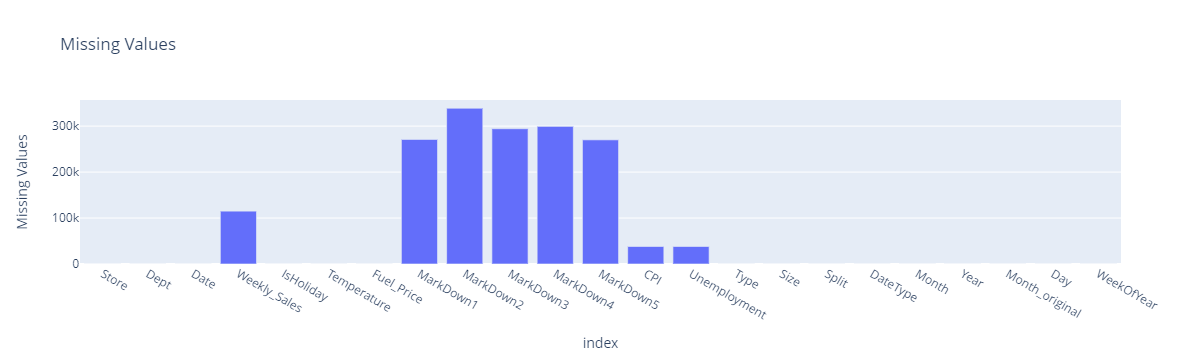

In [16]:
px.bar(walmart_missing_values,
       x=walmart_missing_values.index,
       y=walmart_missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"))

#### **2. Filling the missing values**

##### Since more than 50% of the values are missing, we are not dropping the values, instead we are using the method of "Interpolation" to fill in the missing values at the columns "Weekly_Sales", "CPI", "Unemployment"

In [17]:
# # Here we fill in the missing values for "Weekly_Sales", "CPI", "Unemployment"
# walmart_merged['Weekly_Sales'] = walmart_merged['Weekly_Sales'].interpolate(method='linear', limit_direction='both')
# walmart_merged['CPI'] = walmart_merged['CPI'].interpolate(method='linear', limit_direction='both')
# walmart_merged['Unemployment'] = walmart_merged['Unemployment'].interpolate(method='linear', limit_direction='both')

##### Here for the columns "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4" and "MarkDown5" we will not be using Interpolation this is because the markdown in walmart are discounted sales that happen at certain festive months.The presence of null values here mean that markdown sales never happened at those dates/months.

##### This means we will use null values to fill in the missing details

In [18]:
walmart_final_set.fillna(0, inplace=True)

### **Detecting Outliers**
#### Outliers based on "Weekly_Sales" and "Type" of store

[Text(0.5, 1.0, 'Outlier detection on Sales and Store type')]

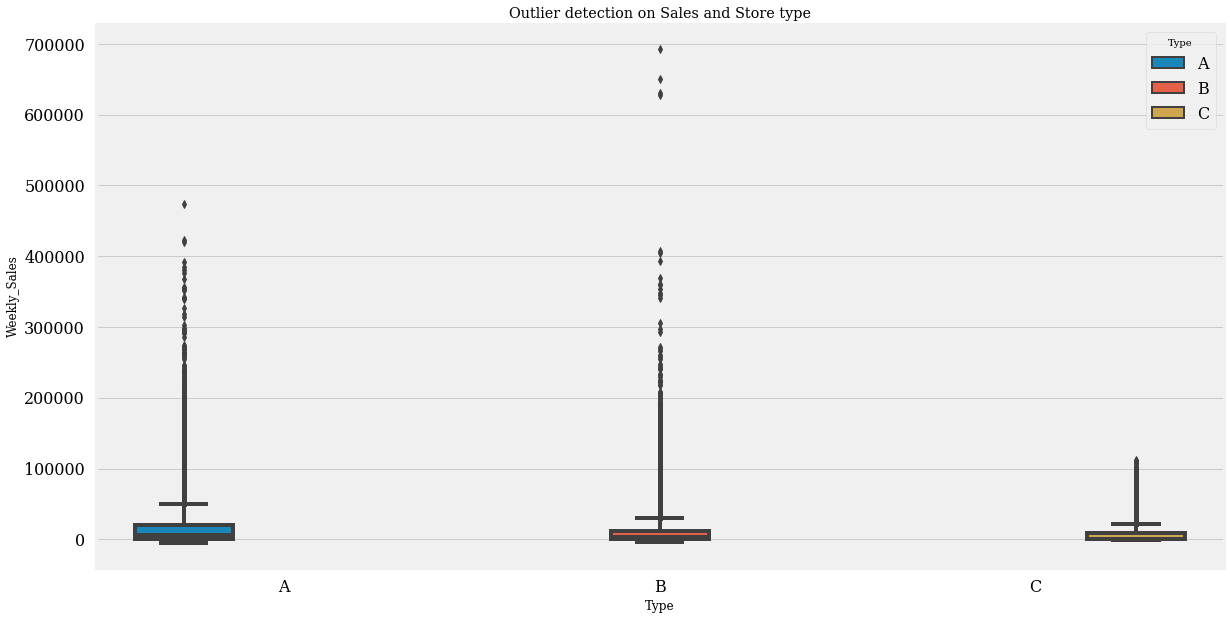

In [19]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Type', y='Weekly_Sales', data = walmart_final_set, hue='Type').set(title = "Outlier detection on Sales and Store type")

#### Mostly sales happen on the festive times. 
#### so let's take the mean sales which is approximately 300000 (During festive seasons alone, not applicable for non festive months).

In [20]:
Outlier_Data = walmart_final_set[(walmart_final_set['Weekly_Sales'] > 300000)]
Outlier_Data[['Date', 'Weekly_Sales', 'Type']].T

32594                36312                36557   \
Date          2018-11-26 00:00:00  2019-11-25 00:00:00  2019-12-23 00:00:00   
Weekly_Sales            381072.11            385051.04            318422.01   
Type                            A                    A                    A   

                           51826                55545                90645   \
Date          2018-11-26 00:00:00  2019-11-25 00:00:00  2018-11-26 00:00:00   
Weekly_Sales            342578.65             326866.6            693099.36   
Type                            A                    A                    B   

                           90886                90936                94393   \
Date          2018-12-24 00:00:00  2018-12-24 00:00:00  2019-11-25 00:00:00   
Weekly_Sales            406988.63            404245.03            630999.19   
Type                            B                    B                    B   

                           94634   ...               219800  \
Date          2019-12-23 00:00:00  ...  2018-11-26 00:00:00   
Weekly_Sales             341308.0  ...            369830.98   
Type                            B  ...                    B   

                           223478               259799               263519  \
Date          2019-11-25 00:00:00  2018-11-26 00:00:00  2019-11-25 00:00:00   
Weekly_Sales            347680.08            420586.57            368484.19   
Type                            B                    A                    A   

                           269997               273668               333594  \
Date          2018-11-26 00:00:00  2019-11-25 00:00:00  2018-11-26 00:00:00   
Weekly_Sales            355356.39            351763.71            627962.93   
Type                            A                    A                    B   

                           337053               364033               367624  
Date          2019-11-25 00:00:00  2018-11-26 00:00:00  2019-11-25 00:00:00  
Weekly_Sales            649770.18            339700.62            351553.98  
Type                            B                    A                    A  

[3 rows x 34 columns]

##### As we can see for all years, there seems to be an exceptionally high volume of sales towards the end of November.
##### This is caused due to the following days like "Black Friday" towards the end of November and also "Pre-Christmas" towards the end of December


# **Visualizing the Dataset**

## **A. Store type and it's popularity**

##### Here the Walmart Store Types are represented as 'A', 'B' and 'C'
##### A = Large sized store
##### B = Medium sized store
##### C = Small sized store

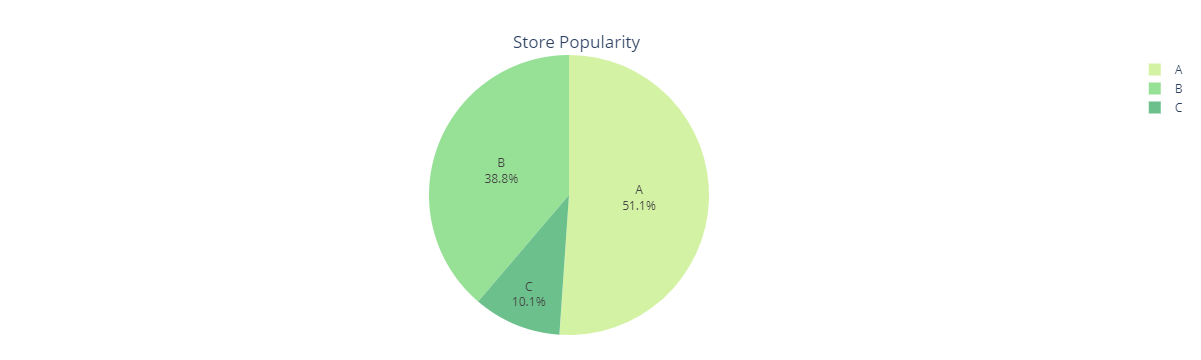

In [21]:
store_types = walmart_final_set.Type.value_counts().to_dict()
type_df = pd.DataFrame(list(store_types.items()), columns=['Type_Of_Store', 'Number_Of_Stores'])
fig = px.pie(type_df, values='Number_Of_Stores', names='Type_Of_Store', title="Store Popularity", labels='Type_Of_Store', color_discrete_sequence=px.colors.sequential.Emrld)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin=dict(t=55, b=25, l=25, r=25), title_x=0.48, title_y=0.9)
fig.show()

##### From the above pie chart we can understand that 
##### Type A stores (Larger) are more popular than Type B (Medium) and Type C (Small) stores

## **B. Monthly sales per year**

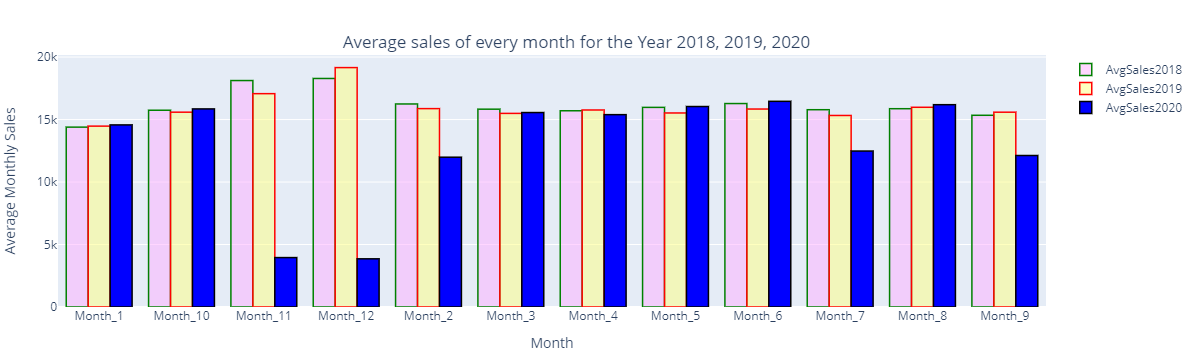

In [22]:
sales_in_2018 = walmart_final_set[(walmart_final_set.Year == 2018)].groupby('Month')['Weekly_Sales'].mean().to_dict()
sales_2018_DF = pd.DataFrame(list(sales_in_2018.items()), columns=['Month', 'AvgSales2018'])

sales_in_2019 = walmart_final_set[walmart_final_set.Year == 2019].groupby('Month')['Weekly_Sales'].mean().to_dict()
sales_2019_DF = pd.DataFrame(list(sales_in_2019.items()), columns=['Month', 'AvgSales2019'])

sales_in_2020 = walmart_final_set[walmart_final_set.Year == 2020].groupby('Month')['Weekly_Sales'].mean().to_dict()
sales_2020_DF = pd.DataFrame(list(sales_in_2020.items()), columns=['Month', 'AvgSales2020'])

monthly_merged = sales_2018_DF.merge(sales_2019_DF, how='right', on='Month').merge(sales_2020_DF, how='left', on='Month')


# create graph1 
graph1 = go.Bar(
                x = sales_2018_DF.Month,
                y = sales_2018_DF.AvgSales2018,
                name = "AvgSales2018",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='green',width=1.5)))
# create graph2 
graph2 = go.Bar(
                x = sales_2019_DF.Month,
                y = sales_2019_DF.AvgSales2019,
                name = "AvgSales2019",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='red',width=1.5)))

# create graph3 
graph3 = go.Bar(
                x = sales_2020_DF.Month,
                y = sales_2020_DF.AvgSales2020,
                name = "AvgSales2020",
                marker = dict(color = 'Blue',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
data = [graph1, graph2, graph3]
layout = go.Layout(barmode = "group",
                   title='Average sales of every month for the Year 2018, 2019, 2020',
                   xaxis_title="Month",
                   yaxis_title="Average Monthly Sales")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes( dtick=1)
fig.update_layout(margin=dict(t=55,b=25, l=25, r=25), title_x=0.48, title_y=0.9)
fig.show()

#### From the above graph we can deduce, For all the 3 consecutive Years January had the least number of sales when compared to the other months
#### The month of December in the year 2019 had the highest number of sales when compared to the other months 
#### Also we can also see that between the months of February to October the sales seems to be fluctuate very less and are almost the same 

## **C. Average Weekly Sales - per Year**

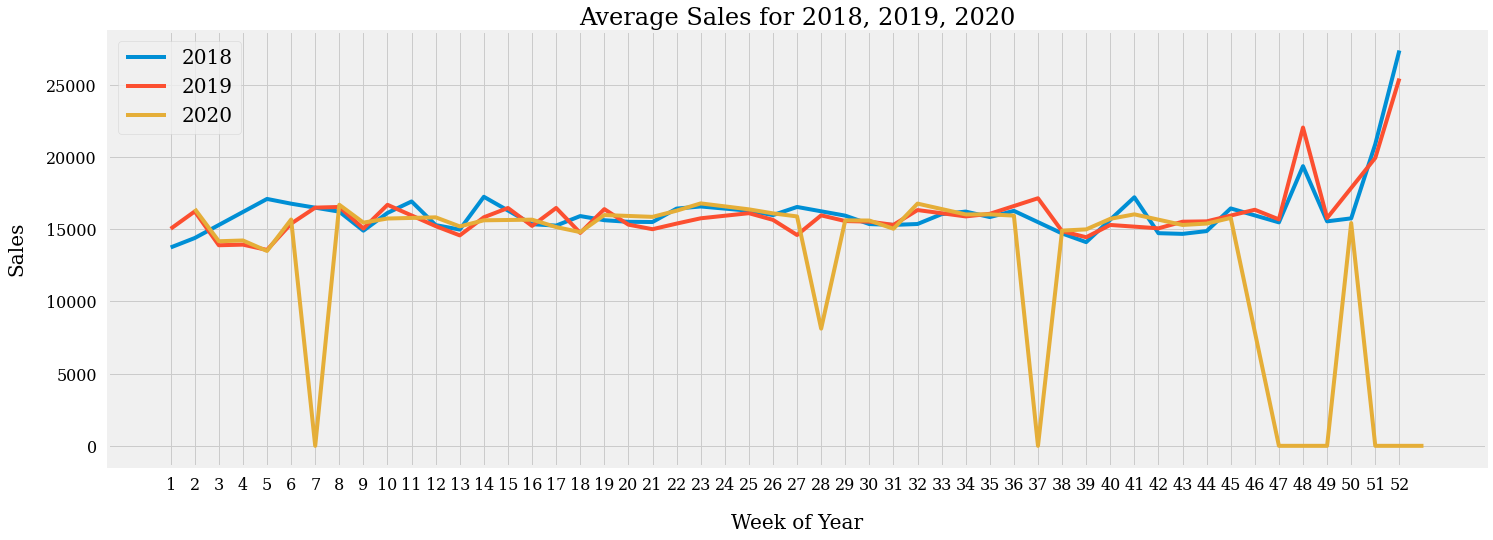

In [23]:
weekly_sales_2018 = walmart_final_set[walmart_final_set.Year==2018].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2019 = walmart_final_set[walmart_final_set.Year==2019].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2020 = walmart_final_set[walmart_final_set.Year==2020].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2018.index, weekly_sales_2018.values)
plt.plot(weekly_sales_2019.index, weekly_sales_2019.values)
plt.plot(weekly_sales_2020.index, weekly_sales_2020.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Sales for 2018, 2019, 2020", fontsize=24)
plt.legend(['2018', '2019', '2020'], fontsize=20);

#### The above graphs gives us insights on many things, but the notable findings are as below
#### The Weeks before Christmas and Thanksgiving saw a high volume of sales on 2018 and 2019.
#### However, this same trend did not follow in 2020, was because of the global pandemic (Covid-19)

## **D. Average Department Sales**

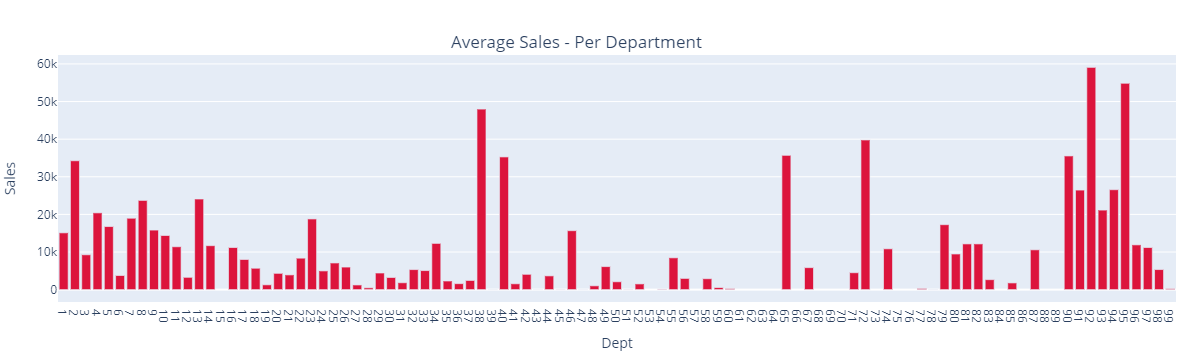

In [24]:
dept_sales = walmart_final_set.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(dept_sales, 
             x=dept_sales.index, 
             y=dept_sales.values,  
             title="Average Sales - Per Department",
             labels={'x':'Dept', 'y':'Sales'},
             color_discrete_sequence=["#DC143C"])

fig.update_xaxes(tick0=1, dtick=1)
fig.update_layout(margin=dict(t=55,b=25, l=25, r=25), title_x=0.48, title_y=0.9)
fig.show()

#### Each department represent a certain type of product placed for sale in a walmart store
#### From the above graphs we have understood that Department numbers 38, 92 and 95 have the highest average sales for the years 2018, 2019 and 2020

## **E. Average sales in the 45 stores we have taken into consideration for the years 2018, 2019 and 2020**

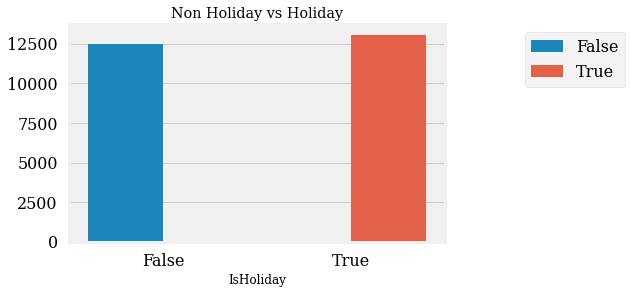

In [25]:
sales_on_holidays = walmart_final_set.groupby('IsHoliday')['Weekly_Sales'].mean()
fig = sns.barplot(x=sales_on_holidays.index, y=sales_on_holidays.values, hue=sales_on_holidays.index)
fig.set_title('Non Holiday vs Holiday')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

#### From the above graph it is evident that the sales are much higher during holidays

## **F. Understanding the relationship between the Week of Year and Sales**

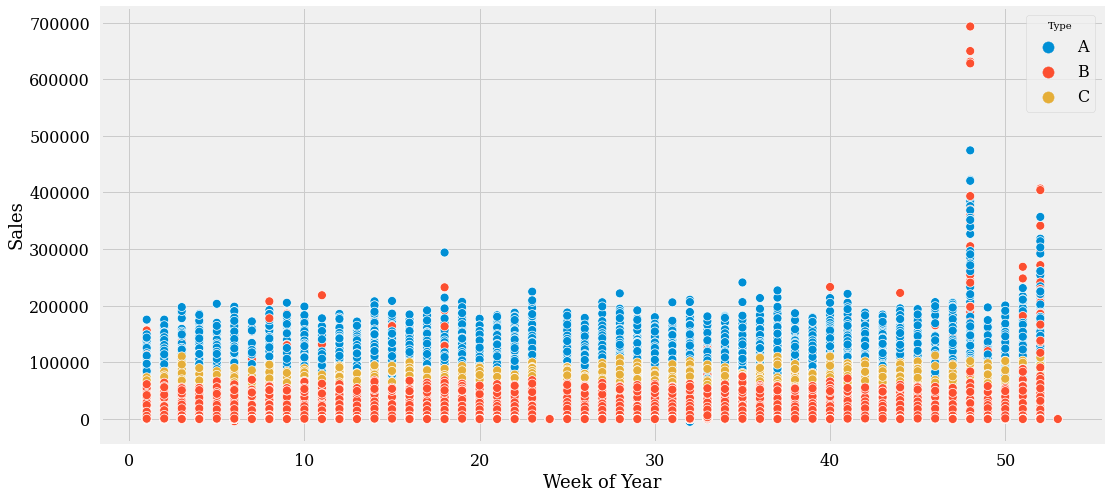

In [26]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=walmart_final_set.WeekOfYear, y=walmart_final_set.Weekly_Sales, hue=walmart_final_set.Type, s=80)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=18)
plt.ylabel('Sales', fontsize=18);

#### From the above graph it is evident that the sales at the Walmart stores increase towards the end of the year
#### this is mainly attributed to the reason that there are many number of holidays towards the end of the year
#### Most of these holidays include days like Black Friday, Cyber Monday, Christmas, Boxing day and New Years

## **G. Understanding the relationship between Unemployment and sales**

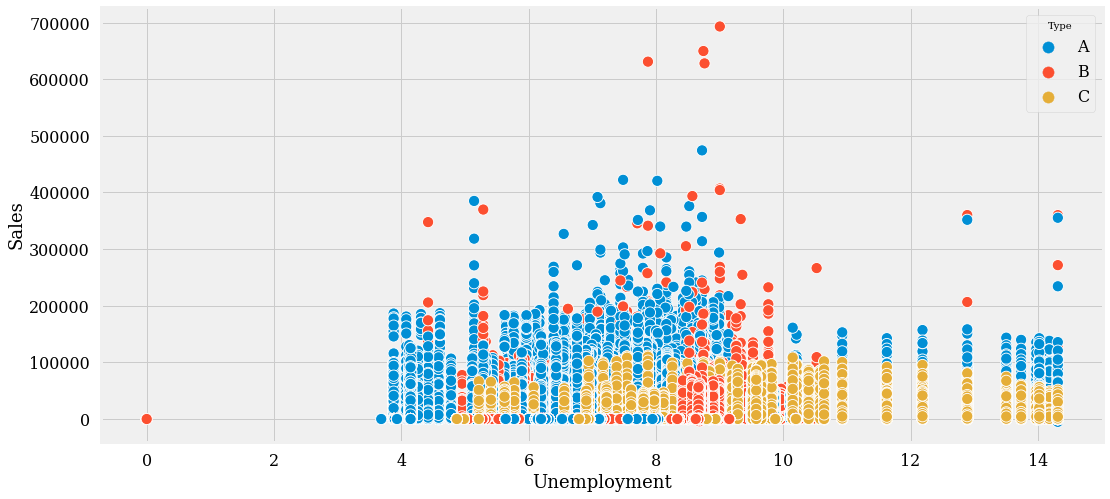

In [27]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=walmart_final_set.Unemployment, y=walmart_final_set.Weekly_Sales, hue=walmart_final_set.Type);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Unemployment', fontsize=18)
plt.ylabel('Sales', fontsize=18);

#### Based on the reading above, Unemployment does seem to affect the sales to an extent
#### When more than 10 working staff leave at any given time, the sales seems to be affected
#### Although there are many factors involved from the outside, we can safely conclude by saying that the sales do have an affect with increasing numbers in Unemployment

## **H. Understanding the relationship between the Size of the store and sales**

Text(0, 0.5, 'Sales')

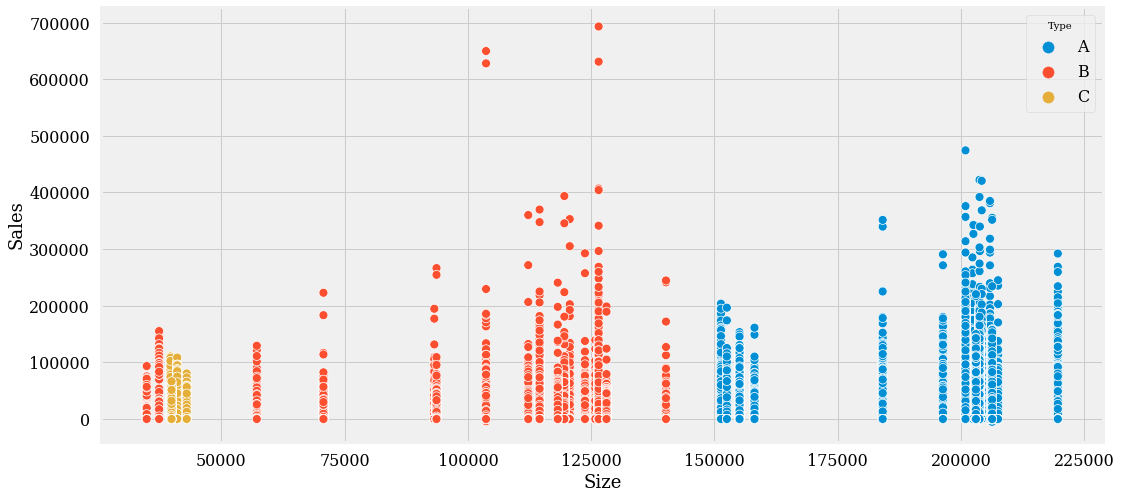

In [28]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=walmart_final_set.Size, y=walmart_final_set.Weekly_Sales, hue=walmart_final_set.Type, s=80);
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Size', fontsize=18)
plt.ylabel('Sales', fontsize=18)

#### As discussed earlier, there are 3 types of stores A (Large), B (Medium) and C (Small)
#### The above graphs suggests that the size of store does not have an effect in amount of sales 
#### This means that Store type B (Medium) has larger number of sales when compared to Store types A (large) and C (Small)

# **Feature Engineering**

## **1. Setting up Categorical Data**

In [46]:
# Create categorical variables which will help us with prediction later in the program
walmart_final_set['Type'] = 'Type_' + walmart_final_set['Type'].map(str)
walmart_final_set['Store'] = 'Store_' + walmart_final_set['Store'].map(str)
walmart_final_set['Dept'] = 'Dept_' + walmart_final_set['Dept'].map(str)
walmart_final_set['IsHoliday'] = 'IsHoliday_' + walmart_final_set['IsHoliday'].map(str)

In [47]:
# Assigning dummy variables for store types, stores, departments, and holidays
store_type_dummy = pd.get_dummies(walmart_final_set['Type'])
store_dummy = pd.get_dummies(walmart_final_set['Store'])
dept_dummy = pd.get_dummies(walmart_final_set['Dept'])
holiday_dummy = pd.get_dummies(walmart_final_set['IsHoliday'])

In [48]:
Month_dummy = pd.get_dummies(walmart_final_set['Month'])

## **2. Setting up features for days towards the end of the year like "Black Friday" and "Pre-Christmas"**

In [49]:
walmart_final_set['Black_Friday'] = np.where((walmart_final_set['DateType']==datetime(2018, 11, 26).date()) | (walmart_final_set['DateType']==datetime(2019, 11, 25).date()), 'yes', 'no')
walmart_final_set['Pre_christmas'] = np.where((walmart_final_set['DateType']==datetime(2018, 12, 23).date()) | (walmart_final_set['DateType']==datetime(2018, 12, 24).date()) | (walmart_final_set['DateType']==datetime(2019, 12, 23).date()) | (walmart_final_set['DateType']==datetime(2019, 12, 24).date()), 'yes', 'no')
walmart_final_set['Black_Friday'] = 'Black_Friday_' + walmart_final_set['Black_Friday'].map(str)
walmart_final_set['Pre_christmas'] = 'Pre_christmas_' + walmart_final_set['Pre_christmas'].map(str)
Black_Friday_dummy = pd.get_dummies(walmart_final_set['Black_Friday'] )
Pre_christmas_dummy = pd.get_dummies(walmart_final_set['Pre_christmas'] )

In [50]:
walmart_final_set = pd.concat([walmart_final_set,holiday_dummy,Pre_christmas_dummy,Black_Friday_dummy],axis=1)

## **3. Creating varaible to store the median sales of the walmart stores**

In [55]:
walmart_median = pd.DataFrame({'Median_On_Sales' :walmart_final_set.loc[walmart_final_set['Split']=='Train'].groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
walmart_median.head()

Type    Dept    Store     Month        IsHoliday  Median_On_Sales
0  Type_A  Dept_1  Store_1   Month_1  IsHoliday_False        17862.400
1  Type_A  Dept_1  Store_1  Month_10  IsHoliday_False        25543.040
2  Type_A  Dept_1  Store_1  Month_10   IsHoliday_True        27591.615
3  Type_A  Dept_1  Store_1  Month_11  IsHoliday_False        18870.100
4  Type_A  Dept_1  Store_1  Month_11   IsHoliday_True        20911.250

In [56]:
# Merge by type, store, department and month
walmart_final_set = walmart_final_set.merge(walmart_median, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday'])

In [57]:
# Fill missing values in Median 
walmart_final_set['Median_On_Sales'].fillna(walmart_final_set['Median_On_Sales'].loc[walmart_final_set['Split']=='Train'].median(), inplace=True)

## **4. Setting up Lagged Variables**

## **This is done to get the previous week sales of the Walmart stores from a given date**

In [58]:
walmart_final_set['LagBackDates'] = walmart_final_set['Date']- timedelta(days=7)
walmart_final_set.head()

Store    Dept       Date  Weekly_Sales        IsHoliday  Temperature  \
0  Store_1  Dept_1 2018-05-02      24924.50  IsHoliday_False        42.31   
1  Store_1  Dept_1 2018-05-03      21827.90  IsHoliday_False        46.50   
2  Store_1  Dept_1 2018-05-14      18926.74  IsHoliday_False        74.78   
3  Store_1  Dept_1 2018-05-21      14773.04  IsHoliday_False        76.44   
4  Store_1  Dept_1 2018-05-28      15580.43  IsHoliday_False        80.44   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...     Black_Friday  \
0       2.572        0.0        0.0        0.0  ...  Black_Friday_no   
1       2.625        0.0        0.0        0.0  ...  Black_Friday_no   
2       2.854        0.0        0.0        0.0  ...  Black_Friday_no   
3       2.826        0.0        0.0        0.0  ...  Black_Friday_no   
4       2.759        0.0        0.0        0.0  ...  Black_Friday_no   

      Pre_christmas  IsHoliday_False  IsHoliday_True Pre_christmas_no  \
0  Pre_christmas_no                1               0                1   
1  Pre_christmas_no                1               0                1   
2  Pre_christmas_no                1               0                1   
3  Pre_christmas_no                1               0                1   
4  Pre_christmas_no                1               0                1   

   Pre_christmas_yes Black_Friday_no Black_Friday_yes Median_On_Sales  \
0                  0               1                0        17235.15   
1                  0               1                0        17235.15   
2                  0               1                0        17235.15   
3                  0               1                0        17235.15   
4                  0               1                0        17235.15   

   LagBackDates  
0    2018-04-25  
1    2018-04-26  
2    2018-05-07  
3    2018-05-14  
4    2018-05-21  

[5 rows x 33 columns]

## **5. Setting up sorted data frame to retrieve lagged varibles faster**

In [59]:
walmart_sorted_df = walmart_final_set.sort_values(['Store', 'Dept','DateType'], ascending=[1, 1,1])
walmart_sorted_df = walmart_sorted_df.reset_index(drop=True)

In [60]:
# Initializing new variables
walmart_sorted_df['LagBackSales'] = np.nan 
walmart_sorted_df['LagBackAvailable'] = np.nan 

last_row=walmart_final_set.loc[0] 
row_len = walmart_sorted_df.shape[0]
for index, row in walmart_sorted_df.iterrows():
    lag_date = row["LagBackDates"]
    if((last_row['Date']== lag_date) & (last_row['Weekly_Sales']>0)): 
        walmart_sorted_df.at[index, 'LagBackSales'] = last_row['Weekly_Sales']
        walmart_sorted_df.at[index, 'LagBackAvailable'] = 1
    else:
        walmart_sorted_df.at[index, 'LagBackSales'] = row['Median_On_Sales']
        walmart_sorted_df.at[index, 'LagBackAvailable'] = 0

    last_row = row 
    if(index%int(row_len/10)==0):
        print(str(int(index*100/row_len))+'% loaded')

0% loaded
9% loaded
19% loaded
29% loaded
39% loaded
49% loaded
59% loaded
69% loaded
79% loaded
89% loaded
99% loaded


In [61]:
walmart_final_set = walmart_final_set.merge(walmart_sorted_df[['Dept', 'Store','DateType','LagBackSales','LagBackAvailable']], how = 'inner', on = ['Dept', 'Store','DateType'])
walmart_final_set['Sales_dif'] = walmart_final_set['Median_On_Sales'] - walmart_final_set['LagBackSales']
walmart_final_set[['Dept', 'Store','DateType','LagBackSales','Weekly_Sales','Median_On_Sales']].head()

Dept    Store    DateType  LagBackSales  Weekly_Sales  Median_On_Sales
0  Dept_1  Store_1  2018-05-02      17235.15      24924.50         17235.15
1  Dept_1  Store_1  2018-05-03      17235.15      21827.90         17235.15
2  Dept_1  Store_1  2018-05-14      17235.15      18926.74         17235.15
3  Dept_1  Store_1  2018-05-21      18926.74      14773.04         17235.15
4  Dept_1  Store_1  2018-05-28      14773.04      15580.43         17235.15

In [62]:
#### Backing up the df before feature engineering
walmart_final_set_backup = walmart_final_set.copy()

In [45]:
walmart_final_set = walmart_final_set_backup.copy()

# **Feature Scaling**

In [ ]:
#walmart_final_set['Unemployment'] = (walmart_final_set['Unemployment'] - walmart_final_set['Unemployment'].mean())/(walmart_final_set['Unemployment'].std())
##walmart_final_set['Temperature'] = (walmart_final_set['Temperature'] - walmart_final_set['Temperature'].mean())/(walmart_final_set['Temperature'].std())
#walmart_final_set['Fuel_Price'] = (walmart_final_set['Fuel_Price'] - walmart_final_set['Fuel_Price'].mean())/(walmart_final_set['Fuel_Price'].std())
#walmart_final_set['CPI'] = (walmart_final_set['CPI'] - walmart_final_set['CPI'].mean())/(walmart_final_set['CPI'].std())
#walmart_final_set['MarkDown1'] = (walmart_final_set['MarkDown1'] - walmart_final_set['MarkDown1'].mean())/(walmart_final_set['MarkDown1'].std())
#walmart_final_set['MarkDown2'] = (walmart_final_set['MarkDown2'] - walmart_final_set['MarkDown2'].mean())/(walmart_final_set['MarkDown2'].std())
#walmart_final_set['MarkDown3'] = (walmart_final_set['MarkDown3'] - walmart_final_set['MarkDown3'].mean())/(walmart_final_set['MarkDown3'].std())
#walmart_final_set['MarkDown4'] = (walmart_final_set['MarkDown4'] - walmart_final_set['MarkDown4'].mean())/(walmart_final_set['MarkDown4'].std())
#walmart_final_set['MarkDown5'] = (walmart_final_set['MarkDown5'] - walmart_final_set['MarkDown5'].mean())/(walmart_final_set['MarkDown5'].std())
#walmart_final_set['LaggedSales']= (walmart_final_set['LaggedSales'] - walmart_final_set['LaggedSales'].mean())/(walmart_final_set['LaggedSales'].std())

In [63]:
walmart_final_set['Difference'] = walmart_final_set['Median_On_Sales'] - walmart_final_set['Weekly_Sales']

# **Feature Selection**

## **A. Shortlisting the features using "Filter Method" (Pearson Correlation)**

<ipython-input-64-f23480b050ab>:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[Text(0.5, 1.0, 'Pearson Correlation')]

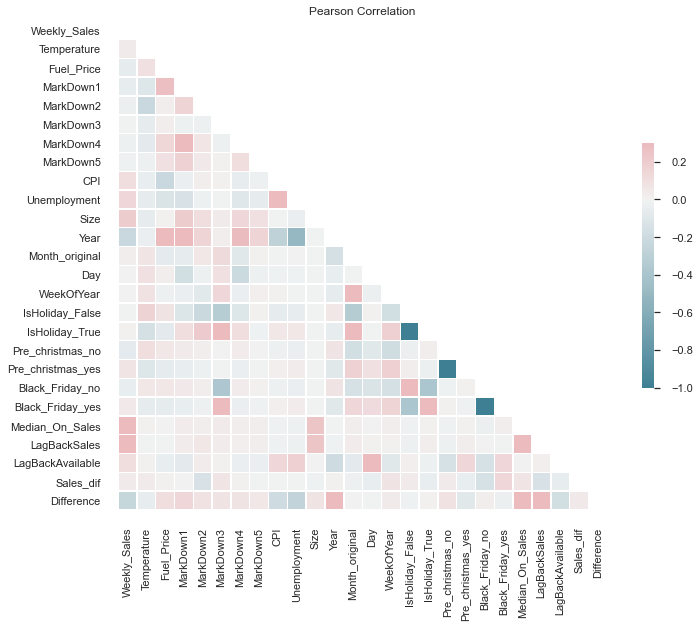

In [64]:
sns.set(style="white")

# Compute the correlation matrix
corr = walmart_final_set.corr()

# using NumPy mask functions to mask the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask = mask ,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title="Pearson Correlation")

In [70]:
selected_feature = [
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'Unemployment',
    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    'LagBackSales',
    'Sales_dif',
    'LagBackAvailable'
    ]

# **Model Training**

## **A. Splitting data to train and test**

In [71]:
train = walmart_final_set.loc[walmart_final_set['Split']=='Train']
test = walmart_final_set.loc[walmart_final_set['Split']=='Test']
test.head()

Store    Dept       Date  Weekly_Sales        IsHoliday  Temperature  \
13  Store_1  Dept_1 2021-05-04           0.0  IsHoliday_False        58.59   
14  Store_1  Dept_1 2021-05-17           0.0  IsHoliday_False        69.53   
15  Store_1  Dept_1 2021-05-24           0.0  IsHoliday_False        77.19   
16  Store_1  Dept_1 2021-05-31           0.0  IsHoliday_False        78.02   
17  Store_1  Dept_1 2021-05-07           0.0  IsHoliday_False        79.85   

    Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Pre_christmas_no  \
13       3.583   12872.34    5687.86     485.97  ...                 1   
14       3.454   16170.50      92.00       8.32  ...                 1   
15       3.494    7959.89     178.00    1621.47  ...                 1   
16       3.466    2369.77     142.45     475.35  ...                 1   
17       3.422    7649.99    3503.29    1766.77  ...                 1   

    Pre_christmas_yes  Black_Friday_no  Black_Friday_yes Median_On_Sales  \
13                  0                1                 0        17235.15   
14                  0                1                 0        17235.15   
15                  0                1                 0        17235.15   
16                  0                1                 0        17235.15   
17                  0                1                 0        17235.15   

    LagBackDates LagBackSales LagBackAvailable Sales_dif  Difference  
13    2021-04-27     17235.15              0.0       0.0    17235.15  
14    2021-05-10     17235.15              0.0       0.0    17235.15  
15    2021-05-17     17235.15              0.0       0.0    17235.15  
16    2021-05-24     17235.15              0.0       0.0    17235.15  
17    2021-04-30     17235.15              0.0       0.0    17235.15  

[5 rows x 37 columns]

## **B. Evaluating model performance**
### **20% is the used sample size**

In [73]:
# Here we keep the seed marked for the purpose of reproducability
np.random.seed(42)
X_train, X_dev, y_train, y_dev = train_test_split(train[selected_feature], train['Difference'], test_size=0.2, random_state=42)
print(X_dev.shape)
print(y_dev.shape)

(84314, 19)
(84314,)


## **C. Model Selection**
### **Here we use Adam Optimizer with a l2 regularization**

In [75]:
neural = False
if neural:
    # Sequential model
    
    adam_regularized = Sequential()

    # First hidden layer now regularized
    adam_regularized.add(Dense(32,activation='relu',
                    input_dim=X_train.shape[1],
                    kernel_regularizer = regularizers.l2(0.01)))

    # Second hidden layer now regularized
    adam_regularized.add(Dense(16,activation='relu',
                       kernel_regularizer = regularizers.l2(0.01)))

    # Output layer stayed sigmoid
    adam_regularized.add(Dense(1,activation='linear'))

    # Setup adam optimizer
    adam_optimizer=keras.optimizers.Adam(lr=0.01,
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08)

    # Compile the model
    adam_regularized.compile(optimizer=adam_optimizer,
                  loss='mean_absolute_error',
                  metrics=['acc'])

    # Train
    history_adam_regularized=adam_regularized.fit(X_train, y_train, # Train on training set
                                 epochs=10, # We will train over 1,000 epochs
                                 batch_size=2048, # Batch size 
                                 verbose=0) # Suppress Keras output
    adam_regularized.evaluate(x=X_dev,y=y_dev)

    # Plot network
    plt.plot(history_adam_regularized.history['loss'], label='Adam Regularized')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    y_pred_neural = adam_regularized.predict(X_dev)

## **D. Algorithm**
### **1. Random Forest Algorithm**

In [76]:
regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished


RandomForestRegressor(n_estimators=20, n_jobs=1, verbose=2)

In [81]:
y_pred_random = regr.predict(X_dev)
y_dev = y_dev.to_frame()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished


In [82]:
def binary(movement):
    direction = np.empty(movement.shape[0])
    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(movement.shape[0]):
        if movement[i] > 0:
            direction[i] = 1
        else:
            direction[i]= 0
    return direction

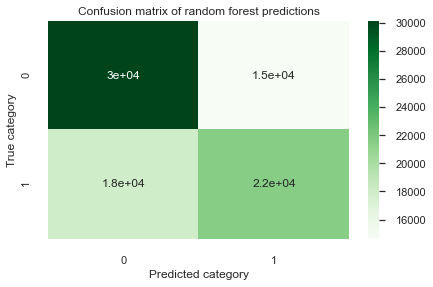

In [84]:
# Transform forest predictions to observe direction of change
direction_true1= binary(y_dev.values)
direction_predict = binary(y_pred_random)

## show confusion matrix random forest
cnf_matrix = confusion_matrix(direction_true1, direction_predict)

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
#ax.set_xticklabels(abbreviation)
#ax.set_yticklabels(abbreviation)
plt.title('Confusion matrix of random forest predictions')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

In [85]:
y_dev['Predicted'] = y_pred_random
df_out = pd.merge(train,y_dev[['Predicted']],how = 'left',left_index = True, right_index = True,suffixes=['_True','_Pred'])
df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out.head()

Store    Dept       Date  Weekly_Sales        IsHoliday  Temperature  \
2   Store_1  Dept_1 2018-05-14      18926.74  IsHoliday_False        74.78   
7   Store_1  Dept_1 2019-05-20      15136.78  IsHoliday_False        67.63   
11  Store_1  Dept_1 2020-05-25      16963.55  IsHoliday_False        77.22   
29  Store_1  Dept_2 2020-05-25      45817.07  IsHoliday_False        77.22   
40  Store_1  Dept_3 2018-05-28       8412.69  IsHoliday_False        80.44   

    Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Pre_christmas_yes  \
2        2.854       0.00        0.0       0.00  ...                  0   
7        3.907       0.00        0.0       0.00  ...                  0   
11       3.561    4039.39        0.0     745.19  ...                  0   
29       3.561    4039.39        0.0     745.19  ...                  0   
40       2.759       0.00        0.0       0.00  ...                  0   

    Black_Friday_no  Black_Friday_yes  Median_On_Sales LagBackDates  \
2                 1                 0         17235.15   2018-05-07   
7                 1                 0         17235.15   2019-05-13   
11                1                 0         17235.15   2020-05-18   
29                1                 0         45072.11   2020-05-18   
40                1                 0          8609.82   2018-05-21   

    LagBackSales LagBackAvailable Sales_dif Difference   Predicted  
2       17235.15              0.0      0.00   -1691.59   671.48175  
7       17235.15              1.0      0.00    2098.37  -733.01500  
11      18517.79              1.0  -1282.64     271.60 -1932.61425  
29      44411.23              1.0    660.88    -744.96 -4449.15200  
40       7813.91              1.0    795.91     197.13  -346.90725  

[5 rows x 38 columns]

In [88]:
def plot_prediction(predicted,true,desciption):
    fig, ax = plt.subplots()
    ax.scatter(true, predicted, edgecolors=(0, 0, 0))
    ax.plot([true.min(), true.max()], [true.min(), true.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted by '+desciption)
    ax.plot([-30,30], [0,0], 'k-')   
    ax.plot([0,0], [-30,30], 'k-')
    plt.show()

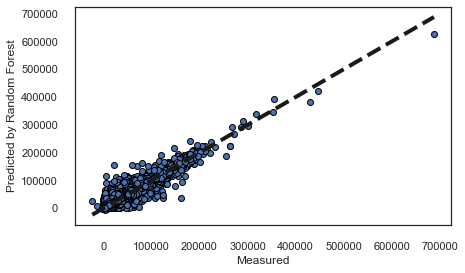

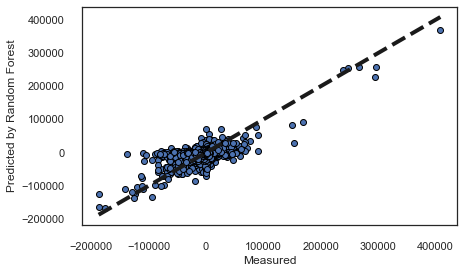

In [90]:
df_out['prediction'] = df_out['Median_On_Sales']-df_out['Predicted']
plot_prediction(df_out['Weekly_Sales'],df_out['prediction'],"Random Forest")
plot_prediction(y_pred_random,y_dev['Difference'].values,"Random Forest")

In [91]:
print("Medians: "+str(sum(abs(df_out['Difference']))/df_out.shape[0]))
print("Random Forest: "+str(sum(abs(df_out['Weekly_Sales']-df_out['prediction']))/df_out.shape[0]))

Medians: 1995.185589818989
Random Forest: 2014.653176900727


In [93]:
#Random forest model specification. Set n_estimators lower for faster performance
rf_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=0, warm_start=False)

#Train on data
rf_model.fit(train[selected_feature], train['Difference'])

RandomForestRegressor(n_estimators=80, n_jobs=1)

In [115]:
rf_model.score(train[selected_feature], train['Difference'])

0.906507919199529

In [95]:
final_y_prediction = rf_model.predict(test[selected_feature])

In [103]:
randomForest_file = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)], axis=1)
randomForest_file['prediction_by_RandomForest'] = randomForest_file['Median_On_Sales']-testfile[0]
randomForest_file = randomForest_file[['Date','prediction_by_RandomForest'] ]
randomForest_file.to_csv("Ramdom_Forest_prediction.csv")

### **2. Linear Regression Algorithm**

In [112]:
# Create and train the model
model = LinearRegression()
model.fit(train[selected_feature], train['Difference'])

LinearRegression()

In [113]:
final_linear_prediction = model.predict(test[selected_feature])

In [124]:
LinearRegression_file = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_linear_prediction)], axis=1)
LinearRegression_file['prediction_by_LinearRegression'] = LinearRegression_file['Median_On_Sales']-final_linear_prediction
LinearRegression_file = LinearRegression_file[['Date','prediction_by_LinearRegression'] ]
LinearRegression_file.to_csv("Linear_Regression_prediction.csv")